In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import pandas as pd

# Load the main dataset, skipping the first few rows if necessary
gdp_data = pd.read_csv('/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv', skiprows=4)

# Load the country metadata
country_metadata = pd.read_csv('/content/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv')

# Load the indicator metadata
indicator_metadata = pd.read_csv('/content/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv')




In [38]:
indicator_metadata = pd.read_csv('/content/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv')


In [21]:
# Inspect the first few rows of each DataFrame
print(gdp_data.head())
print(country_metadata.head())
print(indicator_metadata.head())

                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
2  NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
3  NY.GDP.MKTP.CD  1.041165e+10  1.113592e+10  1.195171e+10  1.268581e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2015          2016          2017  \
0           NaN           NaN  ...  2.962907e+09  2.983635e+

In [22]:
# Inspect the general information about each DataFrame
print(gdp_data.info())
print(country_metadata.info())
print(indicator_metadata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            124 non-null    float64
 5   1961            126 non-null    float64
 6   1962            127 non-null    float64
 7   1963            127 non-null    float64
 8   1964            127 non-null    float64
 9   1965            139 non-null    float64
 10  1966            142 non-null    float64
 11  1967            145 non-null    float64
 12  1968            150 non-null    float64
 13  1969            150 non-null    float64
 14  1970            159 non-null    float64
 15  1971            162 non-null    float64
 16  1972            162 non-null    float64
 17  1973            162 non-null    flo

In [23]:
# Drop the last column which is mostly empty
gdp_data.drop(columns=['Unnamed: 68'], inplace=True)

# Drop the 2023 column due to excessive missing values
gdp_data.drop(columns=['2023'], inplace=True)

# Drop non-essential columns
gdp_data_clean = gdp_data.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)


In [24]:
# Fill NaN values with the mean of their respective columns
gdp_data_clean = gdp_data_clean.set_index('Country Name')
gdp_data_clean = gdp_data_clean.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

# Verify that there are no more NaN values
print(gdp_data_clean.isnull().sum())


1960    0
1961    0
1962    0
1963    0
1964    0
       ..
2018    0
2019    0
2020    0
2021    0
2022    0
Length: 63, dtype: int64


               1960          1961          1962          1963          1964  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   7.386490e+10  7.530797e+10  7.912842e+10  8.568375e+10  9.460130e+10   
std    1.501088e+11  1.573756e+11  1.687864e+11  1.819059e+11  1.991479e+11   
min    1.201202e+07  1.159202e+07  9.122751e+06  1.084010e+07  1.271247e+07   
25%    3.801652e+09  3.208254e+09  2.938190e+09  3.631736e+09  3.566547e+09   
50%    7.386490e+10  7.530797e+10  7.912842e+10  8.568375e+10  9.460130e+10   
75%    7.386490e+10  7.530797e+10  7.912842e+10  8.568375e+10  9.460130e+10   
max    1.381136e+12  1.446356e+12  1.546369e+12  1.670666e+12  1.832616e+12   

               1965          1966          1967          1968          1969  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   9.479058e+10  1.050138e+11  1.092862e+11  1.142328e+11  1.261305e+11   
std    2.175748e+11  2.402276e+11  2.569975e+11  2.

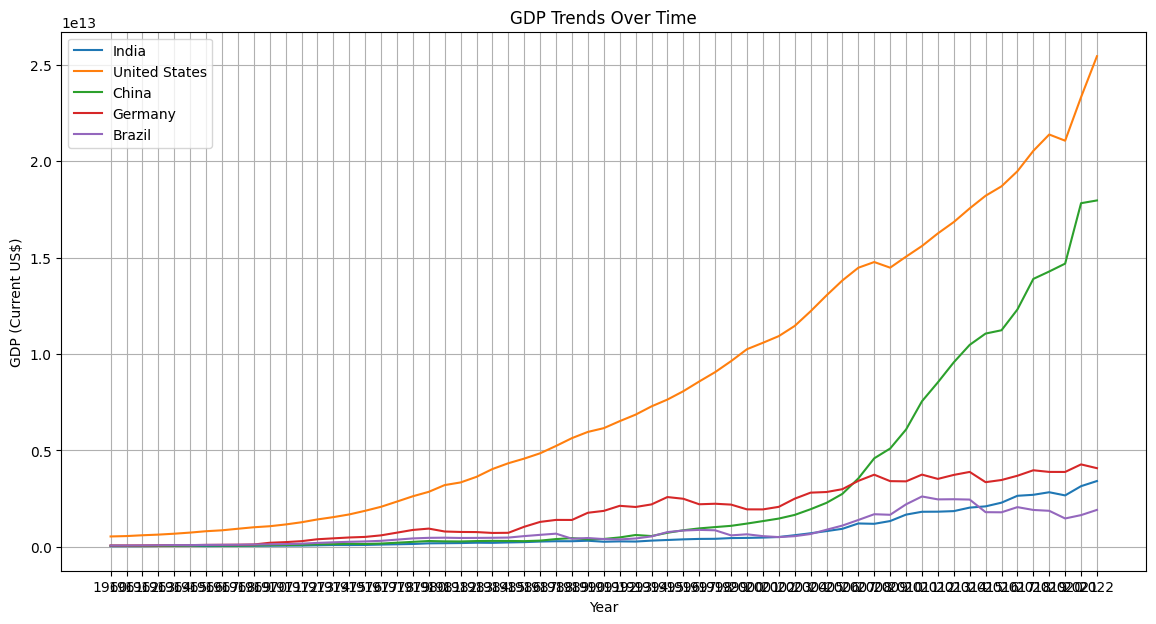

In [26]:
import matplotlib.pyplot as plt

# Descriptive statistics
print(gdp_data_clean.describe())

# GDP trends over time for a few countries
countries = ['India', 'United States', 'China', 'Germany', 'Brazil']
gdp_countries = gdp_data_clean.loc[countries].transpose()

# Plot the GDP trends
plt.figure(figsize=(14, 7))
for country in countries:
    plt.plot(gdp_countries.index, gdp_countries[country], label=country)

plt.title('GDP Trends Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.legend()
plt.grid(True)
plt.show()



In [29]:
# Inspect the first few rows of the country metadata
print(country_metadata.head())

# Inspect the general information about the country metadata
print(country_metadata.info())

# Check for missing values in the country metadata
print(country_metadata.isnull().sum())

country_metadata.drop(columns=['Unnamed: 5'], inplace=True)



  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE      Europe & Central Asia          High income   
2          AFG                 South Asia           Low income   
3          AFW      Europe & Central Asia          High income   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0  Fiscal year end: March 31; reporting period fo...   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4                       Angola         Na

In [30]:
# Fill NaN values with the mean for numerical columns or with mode for categorical columns
for column in country_metadata.columns:
    if country_metadata[column].dtype.kind in 'biufc':  # Numeric columns
        country_metadata[column].fillna(country_metadata[column].mean(), inplace=True)
    else:  # Categorical columns
        country_metadata[column].fillna(country_metadata[column].mode()[0], inplace=True)

# Verify that there are no more NaN values
print(country_metadata.isnull().sum())


Country Code    0
Region          0
IncomeGroup     0
SpecialNotes    0
TableName       0
dtype: int64


       Country Code                 Region  IncomeGroup  \
count           265                    265          265   
unique          265                      7            4   
top             ABW  Europe & Central Asia  High income   
freq              1                    106          131   

                                             SpecialNotes TableName  
count                                                 265       265  
unique                                                111       265  
top     Fiscal year end: March 31; reporting period fo...     Aruba  
freq                                                  146         1  


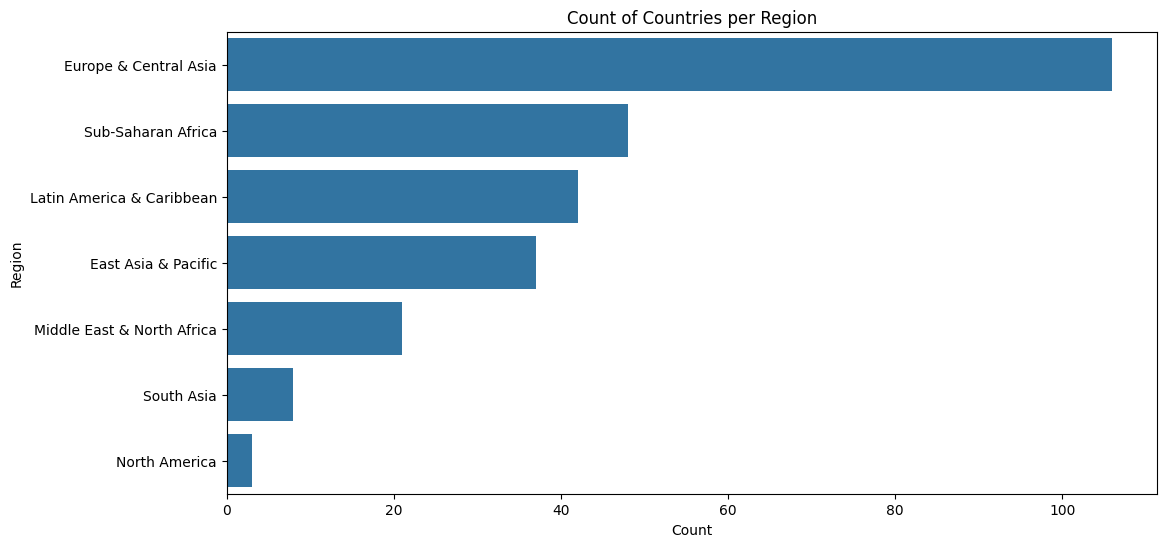

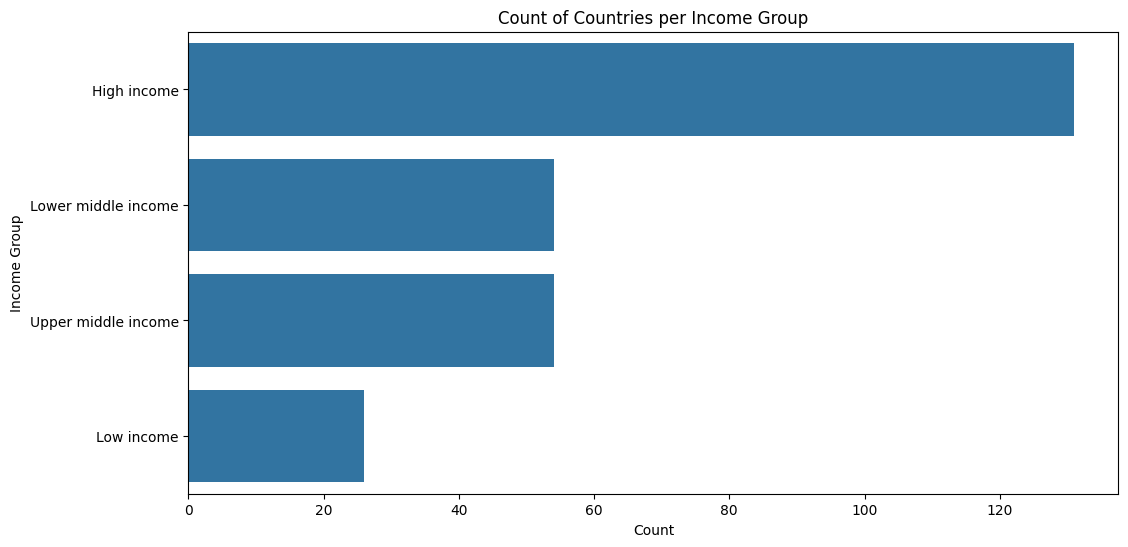

In [31]:
# Descriptive statistics
print(country_metadata.describe(include='all'))

# Visualize a few key statistics about countries
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Count of countries per region
plt.figure(figsize=(12, 6))
sns.countplot(y='Region', data=country_metadata, order=country_metadata['Region'].value_counts().index)
plt.title('Count of Countries per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Example: Count of countries per income group
plt.figure(figsize=(12, 6))
sns.countplot(y='IncomeGroup', data=country_metadata, order=country_metadata['IncomeGroup'].value_counts().index)
plt.title('Count of Countries per Income Group')
plt.xlabel('Count')
plt.ylabel('Income Group')
plt.show()


In [39]:
# Inspect the first few rows of the indicator metadata
print(indicator_metadata.head())

# Inspect the general information about the indicator metadata
print(indicator_metadata.info())

# Check for missing values in the indicator metadata
print(indicator_metadata.isnull().sum())
# Drop the mostly empty column



   INDICATOR_CODE     INDICATOR_NAME  \
0  NY.GDP.MKTP.CD  GDP (current US$)   

                                         SOURCE_NOTE  \
0  GDP at purchaser's prices is the sum of gross ...   

                                 SOURCE_ORGANIZATION  Unnamed: 4  
0  World Bank national accounts data, and OECD Na...         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INDICATOR_CODE       1 non-null      object 
 1   INDICATOR_NAME       1 non-null      object 
 2   SOURCE_NOTE          1 non-null      object 
 3   SOURCE_ORGANIZATION  1 non-null      object 
 4   Unnamed: 4           0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 168.0+ bytes
None
INDICATOR_CODE         0
INDICATOR_NAME         0
SOURCE_NOTE            0
SOURCE_ORGANIZATION    0
Unnamed: 4             1
dtype: int64


In [40]:
# Drop the 'Unnamed: 4' column
indicator_metadata.drop(columns=['Unnamed: 4'], inplace=True)

# Verify that there are no more NaN values
print(indicator_metadata.isnull().sum())


INDICATOR_CODE         0
INDICATOR_NAME         0
SOURCE_NOTE            0
SOURCE_ORGANIZATION    0
dtype: int64


        INDICATOR_CODE     INDICATOR_NAME  \
count                1                  1   
unique               1                  1   
top     NY.GDP.MKTP.CD  GDP (current US$)   
freq                 1                  1   

                                              SOURCE_NOTE  \
count                                                   1   
unique                                                  1   
top     GDP at purchaser's prices is the sum of gross ...   
freq                                                    1   

                                      SOURCE_ORGANIZATION  
count                                                   1  
unique                                                  1  
top     World Bank national accounts data, and OECD Na...  
freq                                                    1  


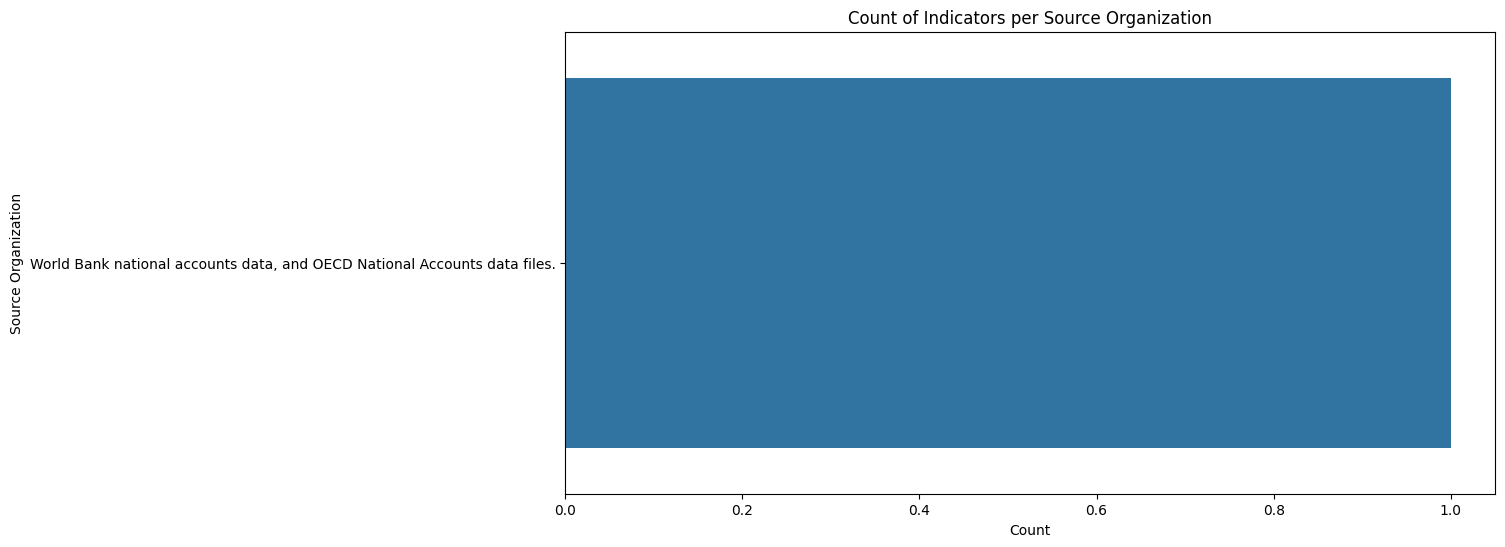

In [41]:
# Descriptive statistics
print(indicator_metadata.describe(include='all'))

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Count of indicators per source organization
plt.figure(figsize=(12, 6))
sns.countplot(y='SOURCE_ORGANIZATION', data=indicator_metadata, order=indicator_metadata['SOURCE_ORGANIZATION'].value_counts().index)
plt.title('Count of Indicators per Source Organization')
plt.xlabel('Count')
plt.ylabel('Source Organization')
plt.show()


In [53]:
import pandas as pd

# Load your cleaned datasets
gdp_data = pd.read_csv('/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv', skiprows=4)
country_metadata = pd.read_csv('/content/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv')
indicator_metadata = pd.read_csv('/content/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv')

# Print columns to identify merge keys
print("Columns of gdp_data:")
print(gdp_data.columns)

print("\nColumns of country_metadata:")
print(country_metadata.columns)

print("\nColumns of indicator_metadata:")
print(indicator_metadata.columns)

# Merge datasets sequentially
merged_data = pd.merge(gdp_data, country_metadata, on='Country Code', how='left')
merged_data = pd.merge(merged_data, indicator_metadata, on='INDICATOR_CODE', how='left')

# Print the merged dataset to verify
print("\nMerged Data Columns:")
print(merged_data.columns)

# Further data preparation steps for modeling can follow here


Columns of gdp_data:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

Columns of country_metadata:
Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

Columns of indicator_metadata:
Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype=

KeyError: 'INDICATOR_CODE'

In [54]:
import pandas as pd

# Load your cleaned datasets
gdp_data = pd.read_csv('/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv', skiprows=4)
country_metadata = pd.read_csv('/content/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv')
indicator_metadata = pd.read_csv('/content/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_296128.csv')

# Print columns to identify merge keys
print("Columns of gdp_data:")
print(gdp_data.columns)

print("\nColumns of country_metadata:")
print(country_metadata.columns)

print("\nColumns of indicator_metadata:")
print(indicator_metadata.columns)

# Adjust merge key based on actual column name in indicator_metadata
# Assuming 'INDICATOR_CODE' is actually named differently
merged_data = pd.merge(gdp_data, country_metadata, on='Country Code', how='left')
# Ensure you are using the correct column name for merging with indicator_metadata
merged_data = pd.merge(merged_data, indicator_metadata, left_on='Indicator Code', right_on='INDICATOR_CODE', how='left')

# Print the merged dataset to verify
print("\nMerged Data Columns:")
print(merged_data.columns)


Columns of gdp_data:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

Columns of country_metadata:
Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

Columns of indicator_metadata:
Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype=

In [56]:
# Assuming you have already merged the datasets into merged_data

# Drop unnecessary columns (if needed)
merged_data_clean = merged_data.drop(['Unnamed: 68', 'Unnamed: 5', 'Unnamed: 4'], axis=1)

# Fill NaN values in numerical columns with their mean
numerical_columns = merged_data_clean.select_dtypes(include=['float64', 'int64']).columns
merged_data_clean[numerical_columns] = merged_data_clean[numerical_columns].fillna(merged_data_clean[numerical_columns].mean())

# Verify if there are any remaining NaN values
print(merged_data_clean.isnull().sum())

# Now merged_data_clean should have NaN values replaced with mean


Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960                   0
                      ..
TableName              1
INDICATOR_CODE         0
INDICATOR_NAME         0
SOURCE_NOTE            0
SOURCE_ORGANIZATION    0
Length: 76, dtype: int64


In [57]:
# Replace NaN in 'TableName' with 'Unknown'
merged_data_clean['TableName'] = merged_data_clean['TableName'].fillna('Unknown')

# Verify if there are any remaining NaN values
print(merged_data_clean.isnull().sum())


Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960                   0
                      ..
TableName              0
INDICATOR_CODE         0
INDICATOR_NAME         0
SOURCE_NOTE            0
SOURCE_ORGANIZATION    0
Length: 76, dtype: int64


In [58]:
import pandas as pd

# Select relevant columns
features = ['Country Code', '2019', '2020', '2021']
target = '2022'

data = merged_data_clean[features + [target]]
data = data.dropna(subset=[target])


In [59]:
X = data[['2019', '2020', '2021']]
y = data[target]


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [62]:
# Example country code for prediction
country_code = 'USA'

# Extract the data for the specific country
country_data = data[data['Country Code'] == country_code][['2019', '2020', '2021']].values

# Predict the GDP for 2023
gdp_2023 = model.predict(country_data)
print(f"Predicted GDP for {country_code} in 2023: ${gdp_2023[0]:.2f}")


Predicted GDP for USA in 2023: $24395937878957.93


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 5.503978672092278e+23
R-squared Score: 0.9977803703131498


In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming merged_data_clean and model are already defined and trained

# Function to predict GDP for a given country
def predict_gdp_for_country(country_code, model, data):
    # Extract the data for the specific country
    country_data = data[data['Country Code'] == country_code][['2019', '2020', '2021']].values

    # Predict the GDP for 2022
    gdp_2022 = model.predict(country_data)

    return gdp_2022[0]

# Get unique country codes from the dataset
country_codes = merged_data_clean['Country Code'].unique()

# Dictionary to store predictions
predictions = {}

# Iterate over each country code and predict GDP
for code in country_codes:
    predicted_gdp = predict_gdp_for_country(code, model, data)
    predictions[code] = predicted_gdp

# Display predictions (you can store them in any format you need)
for code, gdp in predictions.items():
    print(f"Predicted GDP for {code}: {gdp:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Predicted GDP for ABW: 247528225454.68
Predicted GDP for AFE: 1347792243781.41
Predicted GDP for AFG: 260311219886.94
Predicted GDP for AFW: 1114604616711.22
Predicted GDP for AGO: 306319355779.68
Predicted GDP for ALB: 263053185716.67
Predicted GDP for AND: 247934665233.13
Predicted GDP for ARB: 3185839882430.20
Predicted GDP for ARE: 654456882887.45
Predicted GDP for ARG: 729528172647.60
Predicted GDP for ARM: 258721316779.35
Predicted GDP for ASM: 245367114133.63
Predicted GDP for ATG: 246134055766.58
Predicted GDP for AUS: 1840778189169.36
Predicted GDP for AUT: 740371371993.85
Predicted GDP for AZE: 299432102607.86
Predicted GDP for BDI: 247481473172.35
Predicted GDP for BEL: 865124957234.19
Predicted GDP for BEN: 263303472851.05
Predicted GDP for BFA: 265472774497.86
Predicted GDP for BGD: 683753392488.30
Predicted GDP for BGR: 331922840056.68
Predicted GDP for BHR: 284184224896.71
Predicted GDP for BHS: 255544108058.75
Predicted GDP for BIH: 268986474919.93
Predicted GDP for BLR

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [68]:
with open('gdp_forecast_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [72]:
import pandas as pd

# Assuming merged_data is already processed and ready for deployment
merged_data.to_csv('merged_data.csv', index=False)
